In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2

# Basics

## Variance
\begin{equation*}
Var(X) = \frac{\sum_{i=1}^n (x_i - \mu_x)^2}{n}
\end{equation*}

## Standard Deviation
### population
\begin{equation*}
\sigma = \sqrt{\frac{\sum_{i=1}^n (x_i - \mu_x)^2}{n}}
\end{equation*}

Or
\begin{equation*}
\sigma = \sqrt{Var(X)}
\end{equation*}

### samples
\begin{equation*}
s = \sqrt{\frac{\sum_{i=1}^n (x_i - \mu_x)^2}{n-1}}
\end{equation*}

## Covariance
\begin{equation*}
cov(X,Y) = \frac{\sum_{i=1}^n (x_i - \mu_x) (y_i - \mu_y)}{n}
\end{equation*}
So
\begin{equation*}
cov(X,X) = \frac{\sum_{i=1}^n (x_i - \mu_x) (x_i - \mu_x)}{n} = \frac{\sum_{i=1}^n (x_i - \mu_x)^2}{n} = Var(X)
\end{equation*}

## Correlation
\begin{equation*}
corr(X,Y) = \frac{cov(X,Y)}{\sigma_X \sigma_Y} = \frac{\frac{\sum_{i=1}^n (x_i - \mu_x)(y_i - \mu_y)}{n}}{\sigma_X \sigma_Y}
\end{equation*}

# Simple Linear Regression

## Simple line
\begin{equation*}
y = b + mx
\end{equation*}

Where <br>
$b$ where the line intercept the y axis <br>
$m$ the slope of the line <br>

## Regression
\begin{equation*}
y = \beta_0 + \beta_1 x + \epsilon
\end{equation*}

Where <br>
$y$ is our variable we would like to predict <br>
$\beta_0$ is our first parameter, which is the y-axis intercept <br>
$\beta_1$ is our parameter for the input variable (or feature) $x$ <br>
$\epsilon$ is our error term, the unexplainet variation in $y$ <br>

### Reality (sample data)
We do not know the population parameters, we only have samples of the population.

\begin{equation*}
\hat{y} = b_0 + b_1 x
\end{equation*}

Where <br>
$\hat{y}$ is the point estimator for the excepted value of $y$ (Our output parameter we want to predict)

## SSE (Sum of squared errors)
comparing our model, in this case the regression line, with the actual data.
Taking the difference between what our model has predicted ($y_p$) and what was the observed data ($y_o$), we call it error ($e$).

\begin{equation*}
e = y_o - y_p
\end{equation*}

Then we take the square of the errors and summarise them
\begin{equation*}
SSE = \sum_n e^2
\end{equation*}

By taking the square of the error, we are doing two things:<br>
First: Only considering their distance from the line, not their direction. <br>
Secound: Emphasizing the large values, and repressing the small values. <br>

Where:<br>
$X$ and $Y$ are our datasets.<br>
$x_i$ and $y_i$ are our datapoints.<br>
$\hat{x}$ and $\hat{y}$ are our mean for $X$ and $Y$.<br>
$s_x$ and $s_y$ are our standard deviance for $X$ and $Y$.<br>

## Centroid
Taking the mean of the Y axis and taking the mean of the X axis. <br>
Using these as coordinates to get a new point, which is called the centroid.

__The best-fit regression line will/must pass through the centroid!__

## Linear regression calculation

\begin{equation*}
\hat{y_i} = b_0 + b_1 x_i
\end{equation*}

\begin{equation*}
b_0 = \hat{y} - b_1\hat{x}
\end{equation*}

\begin{equation*}
b_1 = \frac{\sum (x_i - \hat{x})(y_i - \hat{y})}{\sum (x_i - \hat{x})^2}
\end{equation*}


## Coefficient of determination
It is between 0 and 1. We get closer to __1__, when our linear regression model has small $SSE$, and we get closer to __0__, when our linear regression model has similar $SSE$ as the mean line model.<br>
Compares the explained SSE by the linear regression model, to the total SSE.

\begin{equation*}
r^2 = \frac{SSR}{SST}
\end{equation*}

Where<br>
$SST$ is the SSE of the mean line.<br>
$SSR$ is the SST-SSE of the regression line, or the explained SSE by the regression line.<br>

# Multiple Regression

When two of our dependent variable (input variable) are highly correlating with eachother, it is best to use only one of them, and not both. We have to check the correlation between the input variables in order to avoid duplication.

### Multiple linear regression model:
\begin{equation*}
\hat{y} = b_0 + b_1 x_1 + b_2 x_2 ... + b_n x_n
\end{equation*}

Y:
 [4.53081894 1.84488978 2.23656092 2.71243714 1.90486223 3.20976722
 3.31679183 2.68174641 2.75578181 2.41849248]
Correlation between X1 and Y:
 [[ 1.         -0.78463025]
 [-0.78463025  1.        ]]
Correlation between X2 and Y:
 [[1.         0.66112242]
 [0.66112242 1.        ]]
Correlation between X1 and X2:
 [[ 1.         -0.08125449]
 [-0.08125449  1.        ]]


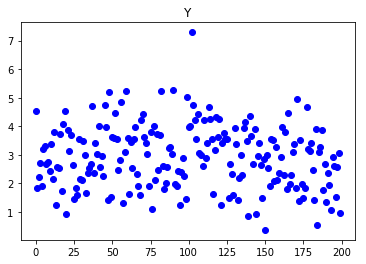

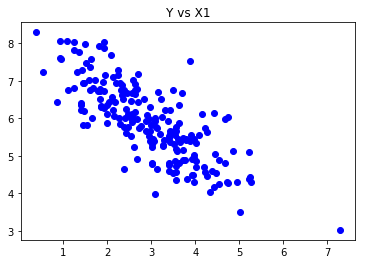

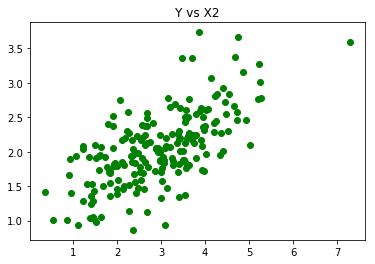

In [2]:
np.random.seed(100)

n = 200

# This is the model we would like to find out
X0 = np.arange(n)
X1 = np.random.normal(6, 1, n)
X2 = np.random.normal(2, 0.5, n)
N = np.random.normal(1, 0.8, n)
Y = 5 + -0.8*X1 + 1.2*X2 + 0.2*N
print("Y:\n", Y[0:10])

C_x1y = np.corrcoef(X1, Y)
print("Correlation between X1 and Y:\n", C_x1y)
C_x2y = np.corrcoef(X2, Y)
print("Correlation between X2 and Y:\n", C_x2y)
C_x1x2 = np.corrcoef(X1, X2)
print("Correlation between X1 and X2:\n", C_x1x2)

# Plotting
fig, ax =  plt.subplots()
ax.set_title("Y")
plt.plot(X0, Y, 'bo')
plt.show()

fig, ax =  plt.subplots()
ax.set_title("Y vs X1")
plt.plot(Y, X1, 'bo')
plt.show()

fig, ax =  plt.subplots()
ax.set_title("Y vs X2")
plt.plot(Y, X2, 'go')
plt.show()

7.944957603889621 -0.848312417072512
0.1625823448260892 1.3505441683866968


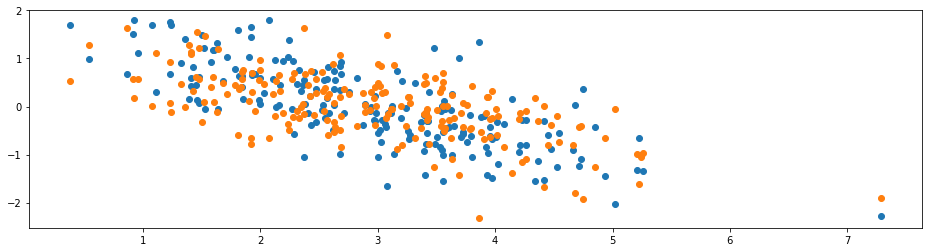

In [4]:
pfit = np.polyfit(X1, Y, 1)
b1_x1 = pfit[0]
b0_x1 = pfit[1]
y_x1 = b0_x1 + b1_x1*X1

print(b0_x1, b1_x1)

pfit = np.polyfit(X2, Y, 1)
b1_x2 = pfit[0]
b0_x2 = pfit[1]
y_x2 = b0_x2 + b1_x2*X2

print(b0_x2, b1_x2)

fig, ax =  plt.subplots( figsize=(16,4) )
ax.set_title("")
ax.plot(Y, y_x2-Y, 'o')
ax.plot(Y, y_x1-Y, 'o')
plt.show()

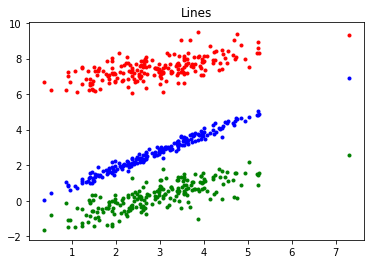

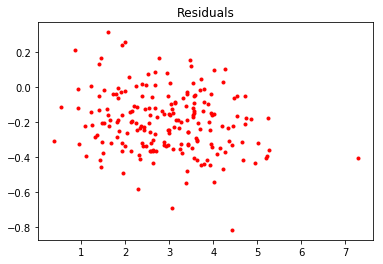

SEE: 14.23608135447032


In [4]:
# Try to find out our model
b0 = 5
b1 = -0.8
b2 = 1.2
L1 = b0 + b1*X1
L2 = b0 + b2*X2
L3 = b0 + b1*X1 + b2*X2

fig, ax =  plt.subplots()
ax.set_title("Lines")
plt.plot(Y, L1, 'g.')
plt.plot(Y, L2, 'r.')
plt.plot(Y, L3, 'b.')
plt.show()

fig, ax =  plt.subplots()
ax.set_title("Residuals")
plt.plot(Y, L3-Y, 'r.')
plt.show()

residuals = L3-Y
SSE = np.sum(residuals**2)
print("SEE:", SSE)

# ANOVA
TODO

# CHI-SQUARE DISTRIBUTION
## Applications
The goodness of fit test, test if the data fit a particular distribution.<br>
The test of independece, which determines if events are independent.<br>
The test of a signle variance, which test variability.<br>

## Description
This distribution is comming from normalizing the samples from a normal distribution so they have a $\mu = 0$ and $\sigma = 1$, and then applying the square function to the samples.

As the degrees of freedom increases, which is the number of different sources of variables accounting for our result, the Chi-Square distribution is starting to look like a normal distribution. At 90 dof or above we could just use the normal distribution.

## 1. Test of single variance
Measuring the variability of the distributions

\begin{equation*}
X_c^2 = \frac{(n-1)s^2}{\sigma_0^2}
\end{equation*}

Where: <br>
$n$: total number of obesrvations in the sample data.<br>
$s^2$: Sample variance <br>
$\sigma_0^2$: Hypothesized value of the population variance <br>

### degrees of freedom
\begin{equation*}
df = n-1
\end{equation*}

Test Statistic: 16.389142703574308


<Figure size 432x288 with 0 Axes>

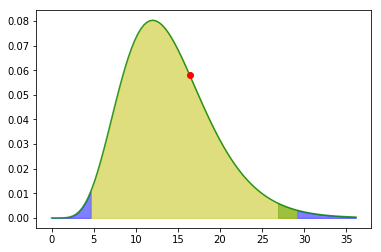

In [102]:
# Example, ISP internet speed standard deviation
# reported standard deviation 12.2%
# Sample of 15 ISPs where STD is 13.2%
# 1% significance level
# Standard deviation is more, than was reported (12.2%).
# H0: sigma^2 <= 12.2%
# Ha: sigma^2 > 12.2%

np.random.seed(122)

dof = 15-1
Xc = (dof*(13.2**2))/(12.2**2)
print("Test Statistic:", Xc)

## Plotting with function
plt.figure(1)
fig, axis = plt.subplots()

# plot function
#ppf: percent point function, quantile function, shows the value at 0.01 probablity, and 0.99 probability
x = np.linspace(chi2.ppf(0, dof), chi2.ppf(0.999, dof), 100)
axis.plot(x, chi2.pdf(x, dof), 'g-', alpha=0.8, label='chi2 pdf')

# Plot the test statistic value
axis.plot(Xc, chi2.pdf(Xc, dof), 'ro')

# plot the left 1%
leftOneP_X = np.linspace(chi2.ppf(0, dof), chi2.ppf(0.01, dof), 20)
leftOneP_Y = chi2.pdf(leftOneP_X, dof)
axis.fill_between(leftOneP_X, leftOneP_Y, color='b', alpha=0.5)

# plot the right 1%
rightOneP_X = np.linspace(chi2.ppf(0.99, dof), chi2.ppf(0.999, dof), 20)
rightOneP_Y = chi2.pdf(rightOneP_X, dof)
axis.fill_between(rightOneP_X, rightOneP_Y, color='b', alpha=0.5)

# plot the top 2%
t2p_x = np.linspace(chi2.ppf(0.98, dof), chi2.ppf(0.99, dof), 20)
t2p_y = chi2.pdf(t2p_x, dof)
axis.fill_between(t2p_x, t2p_y, color='g', alpha=0.5)

# plot middle
mid_X = np.linspace(chi2.ppf(0.01, dof), chi2.ppf(0.99, dof), 100)
mid_Y = chi2.pdf(mid_X, dof)
axis.fill_between(mid_X, mid_Y, color='y', alpha=0.5)

# Conclusion: We cannot say that report was false, the difference is possibly due to random chance
# as this value is in the middle of the deviance distribution function

plt.show()

## 2. Goodness-of-Fit Test
Determine if the data fits a particular distribution or not.

### Test statistic:
\begin{equation*}
T_c = \sum_k \frac{(O-E)^2}{E}
\end{equation*}

Where: <br>
$O$: Observer values (data)<br>
$E$: Expected value (from theory)<br>
$k$: Number of different data cells or categories<br>

__These are right tailed tests, because we take the square of the differences! <br>
The difference will always move the value upwards.
The smallest possible difference we can have is given when the expected values match the observed values, and in this case the $T_c$ is 0!__

Test score: 14.291666666666668
dof: 3
P value: 0.0025338647767197964


<Figure size 432x288 with 0 Axes>

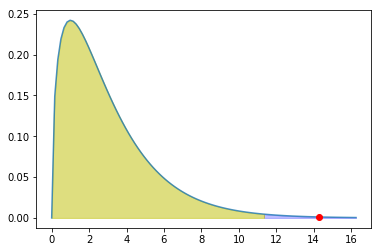

In [50]:
# Absenteeism of college students from math classes is a major concern to math instructors because missing class
# appears to increase the drop rate. Suppose that a study was done to determine if the actual student absenteeism
# rate follows faculty perception.

expected = np.array([50,30,12,8])
observed = np.array([35,40,20,5])

dof = len(expected)-1
Tc = (((observed-expected)**2)/expected).sum()
print("Test score:", Tc)
print("dof:", dof)

## Plotting
plt.figure(1)
fig, axis = plt.subplots()

# The distribution function
x = np.linspace(chi2.ppf(0, dof), chi2.ppf(0.999, dof), 100)
y = chi2.pdf(x, dof)
axis.plot(x, y, '-', alpha=0.8, label='chi2 pdf')

# The test score
axis.plot(Tc, chi2.pdf(Tc, dof), 'ro')

# plot the right 1%
x = np.linspace(chi2.ppf(0.99, dof), chi2.ppf(0.999, dof), 100)
y = chi2.pdf(x, dof)
axis.fill_between(x, y, color='b', alpha=0.25)

# plot the rest %
x = np.linspace(chi2.ppf(0.0, dof), chi2.ppf(0.99, dof), 100)
y = chi2.pdf(x, dof)
axis.fill_between(x, y, color='y', alpha=0.5)

# Get the P value for Tc
P = (chi2.cdf(Tc, dof))
if(P > 0.5):
    P = 1-P
    
print("P value:", P)

# Conclusion, we have a 0.2% chance that this difference is caused by random chance
# So we are farily confident that our expected number of missings from class is not distributed this way

plt.show()

Test score: 0.5345238095238095
dof: 4
P value: 0.02994578012228885


<Figure size 432x288 with 0 Axes>

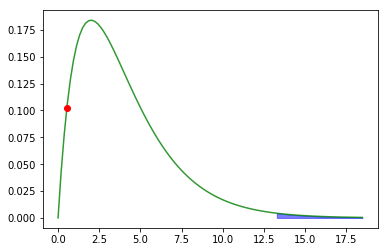

In [60]:
# A factory manager needs to understand how many products are defective versus how many are produced.
expected = np.array([5,6,7,8,10])
observed = np.array([5,7,8,9,11])

dof = len(expected)-1
Tc = (((observed-expected)**2)/expected).sum()
print("Test score:", Tc)
print("dof:", dof)

## Plotting
plt.figure(1)
fig, axis = plt.subplots()

# The distribution function
x = np.linspace(chi2.ppf(0, dof), chi2.ppf(0.999, dof), 100)
y = chi2.pdf(x, dof)
axis.plot(x, y, 'g-', alpha=0.8, label='chi2 pdf')

# The test score
axis.plot(Tc, chi2.pdf(Tc, dof), 'ro')

# plot the right 1%
x = np.linspace(chi2.ppf(0.99, dof), chi2.ppf(0.999, dof), 100)
y = chi2.pdf(x, dof)
axis.fill_between(x, y, color='b', alpha=0.5)

# Get the P value for Tc
P = (chi2.cdf(Tc, dof))
if(P > 0.5):
    P = 1-P

print("P value:", P)

# Conclusion: P value is fairly small, meaning that the it has a low probabilty
# that these distributions doesnt fit well because of random chance.

plt.show()

Test score: 4.083333333333333
dof: 4
P value: 0.39484537126862373


<Figure size 432x288 with 0 Axes>

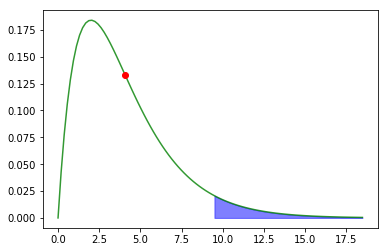

In [59]:
# Employers want to know which days of the week employees are absent in a five-day work week. Most employers
# would like to believe that employees are absent equally during the week. Suppose a random sample of 60
# managers were asked on which day of the week they had the highest number of employee absences.

expected = np.array([12,12,12,12,12])
#observed = np.array([15,12,9,9,15])
observed = np.array([5,12,12,12,12])

dof = len(expected)-1
Tc = (((observed-expected)**2)/expected).sum()
print("Test score:", Tc)
print("dof:", dof)

## Plotting
plt.figure(1)
fig, axis = plt.subplots()

# The distribution function
x = np.linspace(chi2.ppf(0, dof), chi2.ppf(0.999, dof), 100)
y = chi2.pdf(x, dof)
axis.plot(x, y, 'g-', alpha=0.8, label='chi2 pdf')

# The test score
axis.plot(Tc, chi2.pdf(Tc, dof), 'ro')

# plot the right 5%
x = np.linspace(chi2.ppf(0.95, dof), chi2.ppf(0.999, dof), 100)
y = chi2.pdf(x, dof)
axis.fill_between(x, y, color='b', alpha=0.5)

# Get the P value for Tc
P = (chi2.cdf(Tc, dof))
if(P > 0.5):
    P = 1-P

print("P value:", P)

# Conclusion: We cannot say that the observed and expected values are not fitting.

plt.show()

Test score: 141.30679070730687
dof: 99
P value: 0.003395041170082602


<Figure size 432x288 with 0 Axes>

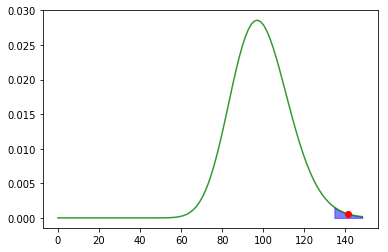

In [230]:
np.random.seed(112)

expected = np.random.normal(50,5,100)
observed = np.random.normal(50,6.5,100)

dof = len(expected)-1
Tc = (((observed-expected)**2)/expected).sum()
print("Test score:", Tc)
print("dof:", dof)

## Plotting
plt.figure(1)
fig, axis = plt.subplots()

# The distribution function
x = np.linspace(chi2.ppf(0, dof), chi2.ppf(0.999, dof), 100)
y = chi2.pdf(x, dof)
axis.plot(x, y, 'g-', alpha=0.8, label='chi2 pdf')

# The test score
axis.plot(Tc, chi2.pdf(Tc, dof), 'ro')

# plot the right 5%
x = np.linspace(chi2.ppf(0.99, dof), chi2.ppf(0.999, dof), 100)
y = chi2.pdf(x, dof)
axis.fill_between(x, y, color='b', alpha=0.5)

# Get the P value for Tc
P = (chi2.cdf(Tc, dof))
if(P > 0.5):
    P = 1-P

print("P value:", P)

plt.show()

## 3 Test of Independence



{False: 953, True: 47}


(array([ 28., 120., 270., 307., 170.,  77.,  23.,   4.,   0.,   1.]),
 array([ 55.94217344,  66.21862367,  76.49507389,  86.77152412,
         97.04797435, 107.32442457, 117.6008748 , 127.87732503,
        138.15377525, 148.43022548, 158.70667571]),
 <a list of 10 Patch objects>)

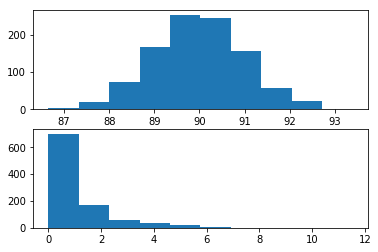

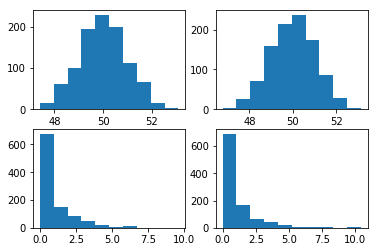

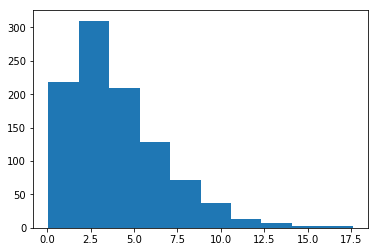

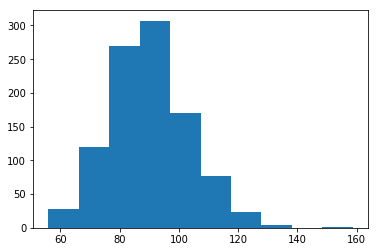

In [5]:
# Chi-squared dist with one degree of freedom
n = np.random.normal(90, 1, 1000)

plt.figure(1)
plt.subplot(2,1,1)
plt.hist(n)

n_sqr = (n-90)**2
plt.subplot(2,1,2)
plt.hist(n_sqr)

# test every elemnt, and creates a new list with the result of the test, true of false
n2_gtoe4 = n_sqr >= 4

unique, counts = np.unique(n2_gtoe4, return_counts=True)
d = dict(zip(unique, counts))
print(d)

np.count_nonzero(n_sqr >= 4)

# Chi-squared dist with more DoF
n1 = np.random.normal(50, 1, 1000)
n2 = np.random.normal(50, 1, 1000)
n3 = np.random.normal(50, 1, 1000)
n4 = np.random.normal(50, 1, 1000)

plt.figure(2)
plt.subplot(2,2,1)
plt.hist(n1)
plt.subplot(2,2,2)
plt.hist(n2)

n1_sqr = (n1-50)**2
n2_sqr = (n2-50)**2
n3_sqr = (n3-50)**2
n4_sqr = (n4-50)**2

plt.subplot(2,2,3)
plt.hist(n1_sqr)
plt.subplot(2,2,4)
plt.hist(n2_sqr)

g = n1_sqr + n2_sqr + n3_sqr + n4_sqr

plt.figure(3)
plt.hist(g)

# with loop

h = np.zeros(1000)

for i in range(90):
    n = np.random.normal(50, 1, 1000)
    n = (n-50)**2
    h = h + n
    pass

plt.figure(4)
plt.hist(h)

# HYPOTHESIS TESTING WITH ONE SAMPLE
We have a distribution and a sample, and would like to tell if this sample is possibly coming from the distribution we have.<br>
We could also have a mean of samples, but not the variance of the samples, because that would be two sample testing.

# HYPOTHESIS TESTING WITH TWO SAMPLES
Groups can be independent or matched pairs.
## Independent group
two sampes are independent, sample values selected from one population are not related in any way to sample values selected from the other population. 
Either population mean or population proportions are tested.
## Matched pairs
Two samples that are dependent. 
Population mean is the tested parameter.

## 10.1. Two independent population means
We have two separate populations, if we sample one one from each, and take the difference, the difference will have a normal distribution according to the central limit theorem.

### Standard error:
\begin{equation*}
SE = \sqrt{ \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} }
\end{equation*}

Where: <br>
$\dot{s_1}$ is the sample variance from distribution one. Which is the estimate for the real $\sigma_1$ <br>
$\dot{s_2}$ is the sample variance from distribution two. Which is the estimate for the real $\sigma_2$ <br>
$n_1$ is the number of samples taken from distribution one. <br>
$n_2$ is the number of samples taken from distribution two.

If we do not know the population variance $\sigma$ we can subsitute the sample variace $s$.<br>
To calculate probablities for the given T or Z value: <br>
Use a __Normal distribution__, when we have __more than 30 samples__ (Z value). <br> 
Use a __student's t distribution__, when we have __less than 30 samples__ (T value).

### Test statistic (t-score):
\begin{equation*}
t_c = \frac{ (\dot{x_1} - \dot{x_2}) - \delta_0}{SE}
\end{equation*}

Where: <br>
$\dot{x_1}$ is the sample mean from distribution one <br>
$\dot{x_2}$ is the sample mean from distribution two <br>
$\delta_0$ is the hypothesized difference between the two means.

## 10.2. Test for Differences in Means: Assuming Equal Population Variances
Assuming that the two population have the same variance. This way we have to combine the variance from distribution one to ditribution two. That is called the pooled variance.

### Pooled variance:
\begin{equation*}
S_p^2 = \frac{ (n_1-1)*s_1^2 + (n_2-1)*s_2^2}{n_1 + n_2 -2}
\end{equation*}

### Test statistic (t-score):
\begin{equation*}
t_c = \frac{ ( \dot{x_1} - \dot{x_2} ) - \delta_0 }{\sqrt{ S_p^2*( \frac{1}{n_1} + \frac{1}{n_2} ) }}
\end{equation*}

## 10.3. Comparing Two Independent Population Proportions
Used when we have discrete values in population one and two.

### Pooled proportion:
\begin{equation*}
P_c = \frac{x_A + x_B}{n_A + n_B}
\end{equation*}

Where:<br>
$x_A$ is the number of successes in sample group A.<br>
$x_B$ is the number of successes in sample group B.<br>
$n_A$ is the number of samples in sample group A.<br>
$n_B$ is the number of samples in sample group B.<br>

### Test statistic (Z-score):
\begin{equation*}
Z_c = \frac{ (\dot{P_A} - \dot{P_B}) - \delta_0 }{ \sqrt{ P_c(1-P_c)(\frac{1}{n_A} + \frac{1}{n_B}) } }
\end{equation*}

Where:<br>
$\dot{P_A}$ is the observed probability that success happened in distribution A. $\dot{P_A} = \frac{X_A}{n_A}$<br>
$\dot{P_B}$ is the observed probability that success happened in distribution B. $\dot{P_B} = \frac{X_B}{n_B}$<br>
$\delta$ is the hypothesized difference between the two proportions.

## 10.4. Two Population Means with Known Standard Deviations
Not very likely situation. Independent means with known standard deviation.

### Standard deviation:
\begin{equation*}
STD = \sqrt{ \frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2} }
\end{equation*}

### Test statistic (Z-score):
\begin{equation*}
Z_c = \frac{(\dot{x_1}-\dot{x_2})-\delta_0}{STD}
\end{equation*}

Where: <br>
$\dot{x_1}$ is the sample mean from distribution one <br>
$\dot{x_2}$ is the sample mean from distribution two <br>
$\delta_0$ is the hypothesized difference between the two means.

## 10.5. Matched or Paired Samples
Each observation has a pair, in the other observation group. We can calculate their differences. <br>
The difference is marked by the letter $d$. <br>
The average of these differences is $\dot{X_d}$, the standard deviation is $S_d$. The standard deviation excepcted to be smaller due to it is matched. <br>
The population mean for the differences is $\mu_d$. <br>
$n$ is the number of pairs not the number of observations.<br>

### Test statistic:
\begin{equation*}
t_c = \frac{\dot{x_d}-\mu_d}{\frac{S_d}{\sqrt{n}}}
\end{equation*}

Where: <br>
$\dot{x_d}$ is the sample mean of the differences.<br>
$\mu_d$ is the hyphotesed difference between the two groups.<br>
$S_d$ is the standard deviation of the differences. <br>
$n$ is the number of pairs<br>

If the __number of pairs is above 30__ we can use a __normal distribution__ to determine the probablity related to this score.<br>
Otherwise use __student's t distribution__, like always.

Mean A: 79.47917073077969
Mean B: 81.64876918067371
Std A: 4.848762481639408
Std B: 5.320305375939057
SE A: 0.4848762481639408
SE B: 0.5320305375939057
Z: -3.0140246807399564
P one side: 0.0012890341614924877
Null hypotesis rejected, as the P value is larger than the critical 5%


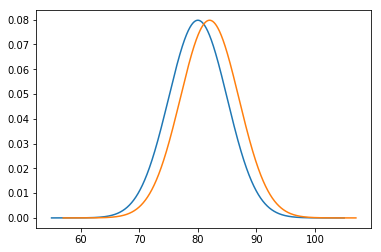

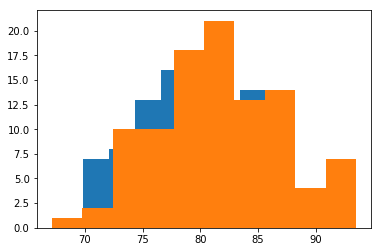

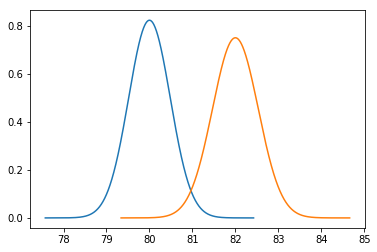

<Figure size 432x288 with 0 Axes>

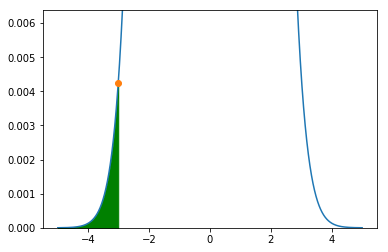

In [62]:
# Statistical testing
np.random.seed(100)

muA = 80
muB = 82
sigma = 5
n = 100

##### the hidden information we cannot see and cannot know, but would like to find out
plt.figure(2)
x_axisA = np.arange( (muA-5*sigma) , (muA+5*sigma), 0.001)
plt.plot(x_axisA, norm.pdf(x_axisA, muA, sigma))

x_axisB = np.arange( (muB-5*sigma) , (muB+5*sigma), 0.001)
plt.plot(x_axisB, norm.pdf(x_axisB, muB, sigma))


##### the information we have
A = np.random.normal(muA, sigma, n)
B = np.random.normal(muB, sigma, n)

plt.figure(1)
plt.hist(A)
plt.hist(B)

# Calculate mean
mean_A = A.mean()
mean_B = B.mean()

print("Mean A:", mean_A)
print("Mean B:", mean_B)

# Calculate standard deviation
std_A = A.std()
std_B = B.std()

print("Std A:", std_A)
print("Std B:", std_B)

# Calculate standard error
se_A = std_A/(n**(1/2))
se_B = std_B/(n**(1/2))

print("SE A:", se_A)
print("SE B:", se_B)

#### The distributon of the means with standard error
plt.figure(3)

x_axisA = np.arange( (muA-5*se_A) , (muA+5*se_A), 0.001)
plt.plot(x_axisA, norm.pdf(x_axisA, muA, se_A))

x_axisB = np.arange( (muB-5*se_B) , (muB+5*se_B), 0.001)
plt.plot(x_axisB, norm.pdf(x_axisB, muB, se_B))

#### Lets set a hypotheses, say that A and B comes from the same distribution, 
#    the alternative hypothesis they are not coming form the same distribution
#    We dont know the alternative distribution we just testing if the same or not.
#    In this case i should use two sided, because different distribution can be larger and smaller.

# Z value
Z = (mean_A - mean_B) / ((se_A**2) + (se_B**2))**(1/2)
print("Z:", Z) # -3.014 mean there is less than 99% that it is coming from the same distribution

# Note: If we have samples less than 30 we should use the student's t distribution instead of the normal distribution

# P value for one side, which means the (A dist - B dist), difference will show where could be the real alternative hypothesis
p_oneSide = norm.cdf(Z, 0, 1) # The p value, i think on sided.
print("P one side:", p_oneSide) # 0.128% chance that they are coming from the same distribution

if(p_oneSide < 0.05):
    print("Null hypotesis rejected, as the P value is larger than the critical 5%")
else:
    print("Null hypotesis can not be rejected, as the P value is smaller than the critical 5%")

# Plotting P value
plt.figure(4)
fig, axis =  plt.subplots()
plt.ylim(top=1.5*norm.pdf(Z, 0, 1))

# Plot a normal distribution
x_axis0 = np.arange( (0-5*1) , (0+5*1), 0.001)
plt.plot(x_axis0, norm.pdf(x_axis0, 0, 1))

# Plot the Z score as a point
plt.plot(Z, norm.pdf(Z, 0, 1), 'o')

# Plot the probability P, as the area under the curve till point Z
x_axisP = np.arange( -5 , Z, 0.001)
p_y = norm.pdf(x_axisP, 0, 1)
axis.fill_between(x_axisP, 0, p_y, color='g')


# Practice for numpy and matplotlib

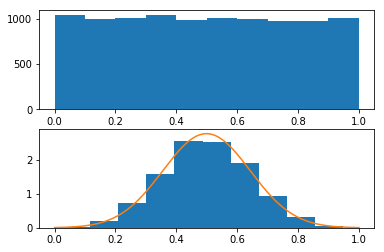

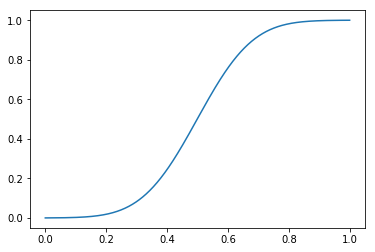

In [63]:
# Central limit theorem
a = np.random.random(10000)
b = np.random.random(10000)
c = np.random.random(10000)
d = np.random.random(10000)

z = a+b+c+d
z= z/4

plt.figure(1)
plt.subplot(211)
plt.hist(a)

plt.subplot(212)
count, bins, ignored = plt.hist(z, density=True)

mu = z.mean()
sigma = z.std()

x_axis = np.arange(-0, 1, 0.001)
plt.plot(x_axis, norm.pdf(x_axis, mu, sigma))

plt.figure(2)
plt.plot(x_axis, norm.cdf(x_axis, mu, sigma))

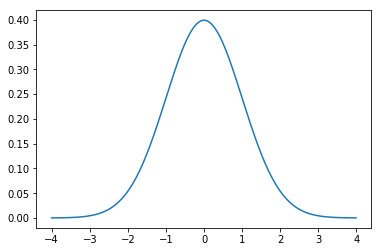

In [64]:
# Normal distribution function

# mean and standard deviation
mu = 0
sigma = 1
x = np.arange(-4*sigma + mu, 4*sigma + mu, 0.01)
y = np.exp( -(x - mu)**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi * sigma))

plt.plot(x, y)

In [65]:
# Indexing

time = np.linspace(20,145,5)
print("time:\n", time)

data = np.sin(np.arange(20)).reshape(5, 4)
print("data:\n", data)

# Index of the maxima for each column
ind = data.argmax(axis=0)
print("ind:\n", ind)

time_max = time[ind]
time_max

data_max = data[ind, range(data.shape[1])]
print("data_max:\n", data_max)

# Length of the secound dimension, aka the # of columns
data.shape[1]
# range -> 0..4 numbers by one
range(data.shape[1])



time:
 [ 20.    51.25  82.5  113.75 145.  ]
data:
 [[ 0.          0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155   0.6569866 ]
 [ 0.98935825  0.41211849 -0.54402111 -0.99999021]
 [-0.53657292  0.42016704  0.99060736  0.65028784]
 [-0.28790332 -0.96139749 -0.75098725  0.14987721]]
ind:
 [2 0 3 1]
data_max:
 [0.98935825 0.84147098 0.99060736 0.6569866 ]


range(0, 4)

In [66]:
# Indexing
a = np.arange(12).reshape(3,4)
b = a > 4
a[b] = 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

# of outliners % :  13.67


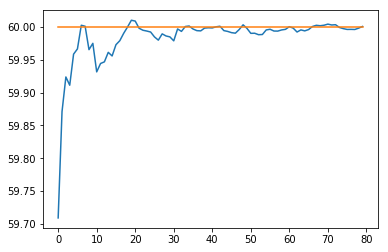

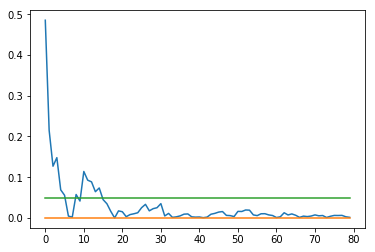

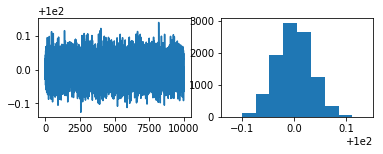

In [4]:
# Runtime sim
n = 40
true_mean = 60
true_std = 0.18

samples = np.zeros(0)
result = np.zeros(0)

for i in range(n):
    s = np.random.normal(true_mean, true_std, 1)
    samples = np.append(samples, s)
    avg = np.average(samples)
    result = np.append(result, avg)
    pass


ref = np.zeros(n)

plt.figure(1)
plt.plot(result)
plt.plot(ref+true_mean)

plt.figure(2)
plt.plot(abs((result-true_mean)*100/true_mean))
plt.plot(ref)
plt.plot(ref+0.05)

# Mekkora annak az esélye hogy n mérés után a hiba kisebb lesz mint 0.05% ?

m = 10000
r = np.zeros(0)

for j in range(m):
    
    samples = np.zeros(0)
    result = np.zeros(0)
    avg = 0.0
    
    for i in range(n):
        s = np.random.normal(true_mean, true_std, 1)
        samples = np.append(samples, s)
        avg = np.average(samples)
        result = np.append(result, avg)
        pass
    
    avg = avg*100/true_mean
    r = np.append(r, avg)
    
    pass

plt.figure(3)
plt.subplot(2,2,1)
plt.plot(r)
plt.subplot(2,2,2)
plt.hist(r)

outliner = np.count_nonzero(abs(r-100) >= 0.05)
print("# of outliners % : ", outliner*100/m)
